In [1]:
# Import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



file_path = "/content/Najafgarh_.xlsx"


    # Define the columns to load
usecols = [
        'Timestamp', 'PM2.5 (Âµg/mÂ³)', 'PM10 (Âµg/mÂ³)', 'NO2 (Âµg/mÂ³)',
        'RH (%)', 'WS (m/s)','WD (deg)','SR (W/mt2)','BP (mmHg)','VWS (m/s)','AT (Â°C)','RF (mm)','TOT-RF (mm)',
    ]

    # Load data using pandas
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=usecols)
print(df.index)
df.drop(df.index[0:9514],inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.index)


  # Display the first few rows of the dataset




RangeIndex(start=0, stop=68400, step=1)
RangeIndex(start=0, stop=58886, step=1)


In [2]:
# Step 2: Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create new features from the timestamp
df['hour'] = df['Timestamp'].dt.hour  # Extract hour of the day
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['Timestamp'].dt.month  # Month (1=January, 12=December)

# Display the updated dataset
print(df.head())


            Timestamp  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  NO2 (Âµg/mÂ³)  \
0 2018-02-01 10:00:00            287.0           383.0          27.83   
1 2018-02-01 11:00:00            263.0           353.0          25.51   
2 2018-02-01 12:00:00            205.0           290.0          19.69   
3 2018-02-01 13:00:00            138.0           243.0          16.93   
4 2018-02-01 14:00:00            141.0           263.0          16.03   

   AT (Â°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  TOT-RF (mm)  SR (W/mt2)  \
0     21.00   54.40      1.38    315.00      NaN          0.0      423.80   
1     23.13   43.42      1.62    307.17      NaN          0.0      487.92   
2     25.82   35.17      1.80    300.83      NaN          0.0      537.83   
3     26.62   35.75      1.93    313.83      NaN          0.0      514.17   
4     26.88   37.08      2.17    318.08      NaN          0.0      387.50   

   BP (mmHg)  VWS (m/s)  hour  day_of_week  month  
0     994.00        0.0    10            3    

In [3]:
# Step 3: Assign month-based weights
month_weights = {
    1: 1.0, 2: 0.8, 3: 0.6, 4: 0.4, 5: 0.2, 6: 0.1,
    7: 0.1, 8: 0.1, 9: 0.2, 10: 0.6, 11: 0.9, 12: 1.0
}
df['PM2.5_month_weight'] = df['month'].map(month_weights)

# Assign hour-based weights
hour_weights = {
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6,
    7: 0.5, 8: 0.5, 9: 0.4, 10: 0.3, 11: 0.3, 12: 0.3,
    13: 0.3, 14: 0.2, 15: 0.2, 16: 0.3, 17: 0.4, 18: 0.5,
    19: 0.6, 20: 0.7, 21: 0.8, 22: 0.9, 23: 0.9
}
df['PM2.5_hour_weight'] = df['hour'].map(hour_weights)

# Display the updated dataset
print(df.head())
def fill_nan_with_iqr(df, columns):
    for col in columns:
        if df[col].isnull().sum() > 0:  # Check if there are missing values
            # Calculate Q1, Q3, and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Interpolate missing values
            df[col] = df[col].interpolate(method='linear', limit_direction='both')

            # Clip values to the IQR range
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns to process
columns_to_fill = [
    'PM2.5 (Âµg/mÂ³)', 'PM10 (Âµg/mÂ³)', 'NO2 (Âµg/mÂ³)',
     'RH (%)', 'WS (m/s)', 'WD (deg)','AT (Â°C)','RF (mm)','TOT-RF (mm)',
     'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]

# Fill NaN values in the dataset
df = fill_nan_with_iqr(df, columns_to_fill)

# Verify if all missing values are handled
print("Missing values after interpolation:")
print(df.isnull().sum())




            Timestamp  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  NO2 (Âµg/mÂ³)  \
0 2018-02-01 10:00:00            287.0           383.0          27.83   
1 2018-02-01 11:00:00            263.0           353.0          25.51   
2 2018-02-01 12:00:00            205.0           290.0          19.69   
3 2018-02-01 13:00:00            138.0           243.0          16.93   
4 2018-02-01 14:00:00            141.0           263.0          16.03   

   AT (Â°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  TOT-RF (mm)  SR (W/mt2)  \
0     21.00   54.40      1.38    315.00      NaN          0.0      423.80   
1     23.13   43.42      1.62    307.17      NaN          0.0      487.92   
2     25.82   35.17      1.80    300.83      NaN          0.0      537.83   
3     26.62   35.75      1.93    313.83      NaN          0.0      514.17   
4     26.88   37.08      2.17    318.08      NaN          0.0      387.50   

   BP (mmHg)  VWS (m/s)  hour  day_of_week  month  PM2.5_month_weight  \
0     994.00        0.0  

In [4]:
from sklearn.preprocessing import StandardScaler
# Step 4: Split data into training and testing sets

# train_data = df[df['Timestamp'].dt.year <= 2023
#                 ]  # Training data
# test_data = df[df['Timestamp'].dt.year == 2024]  # Testing data

# Define features and target variable
features = [
     'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)','VWS (m/s)','TOT-RF (mm)','AT (Â°C)','RF (mm)','hour','day_of_week','month'
]
target = 'PM2.5 (Âµg/mÂ³)'




In [5]:
train_data = df[df['Timestamp'].dt.year <= 2023]
test_data = df[df['Timestamp'].dt.year == 2024]


Only for raw data

In [17]:
X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


# Separate features (X) and target (y)


lagging part

In [6]:
lag_hours = 24 * 365

features lag

In [7]:

for feature in features:
    df[f"{feature}_lag_{lag_hours}"] = df[feature].shift(lag_hours)
df = df.dropna().reset_index(drop=True)

lagged_features = [f"{feature}_lag_{lag_hours}" for feature in features]
features_with_lag = features + lagged_features

# # Redefine training and testing sets with lagged features


Use this if you are not including PM2.5 lag

In [ ]:
train_data = df[df['Timestamp'].dt.year <= 2023]
test_data = df[df['Timestamp'].dt.year == 2024]


X_train = train_data[features_with_lag].values
y_train = train_data[target].values
X_test = test_data[features_with_lag].values
y_test = test_data[target].values

if lag PM2.5 also

In [8]:
df['PM2.5_lag'] = df[target].shift(lag_hours)

In [9]:
final_features = features + lagged_features + [f'PM2.5_lag']

In [10]:
df.dropna(inplace=True)

In [11]:
X = df[final_features]
y = df[target]

In [12]:
train_data = df[df['Timestamp'].dt.year <= 2023]  # Training data (up to 2023)
test_data = df[df['Timestamp'].dt.year == 2024]

In [14]:
print(train_data.shape)
print(test_data.shape)

(34310, 30)
(7056, 30)


In [15]:
X_train = train_data[final_features].values
y_train = train_data[target].values
X_test = test_data[final_features].values
y_test = test_data[target].values

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)

R2 score for different models

Decision Tree Train R²: 0.7492179406105333
Decision Tree Test R²: 0.4047344332709142


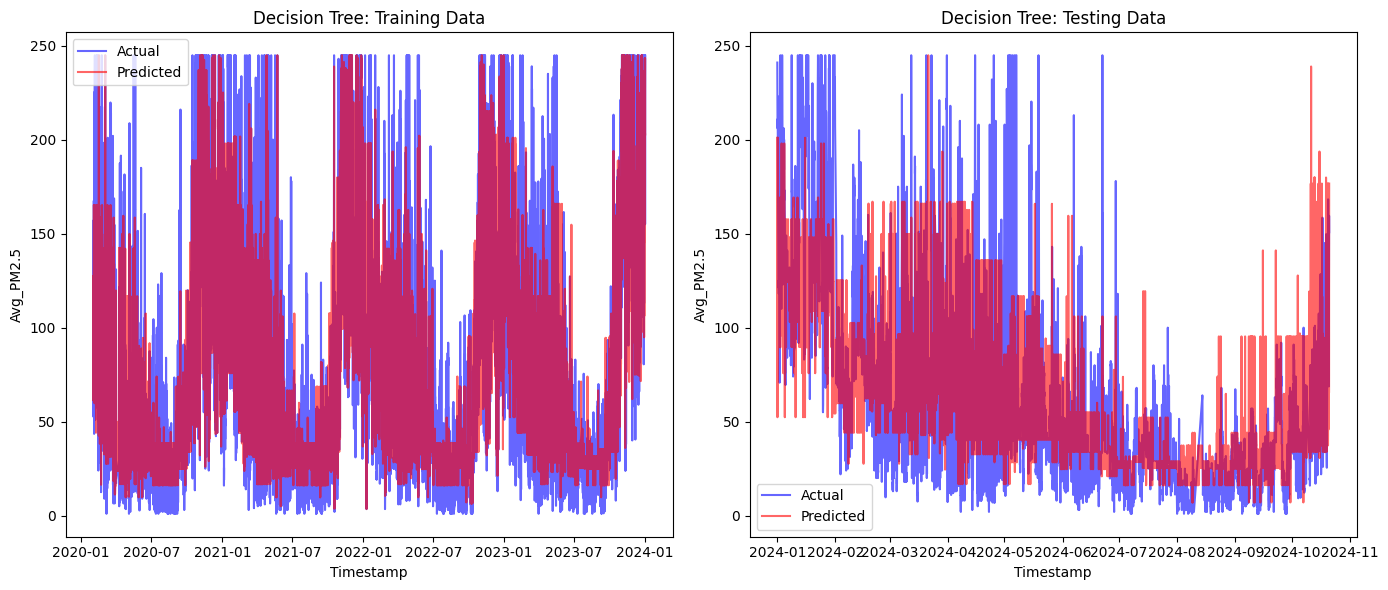

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = decision_tree.predict(X_train)
y_test_pred_tree = decision_tree.predict(X_test)

# Calculate R² scores
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

print(f"Decision Tree Train R²: {r2_train_tree}")
print(f"Decision Tree Test R²: {r2_test_tree}")

# Visualization for Decision Tree
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_tree, label='Predicted', alpha=0.6, color='red')
plt.title("Decision Tree: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_tree, label='Predicted', alpha=0.6, color='red')
plt.title("Decision Tree: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


Random Forest Train R²: 0.797596058479057
Random Forest Test R²: 0.4965890182513716


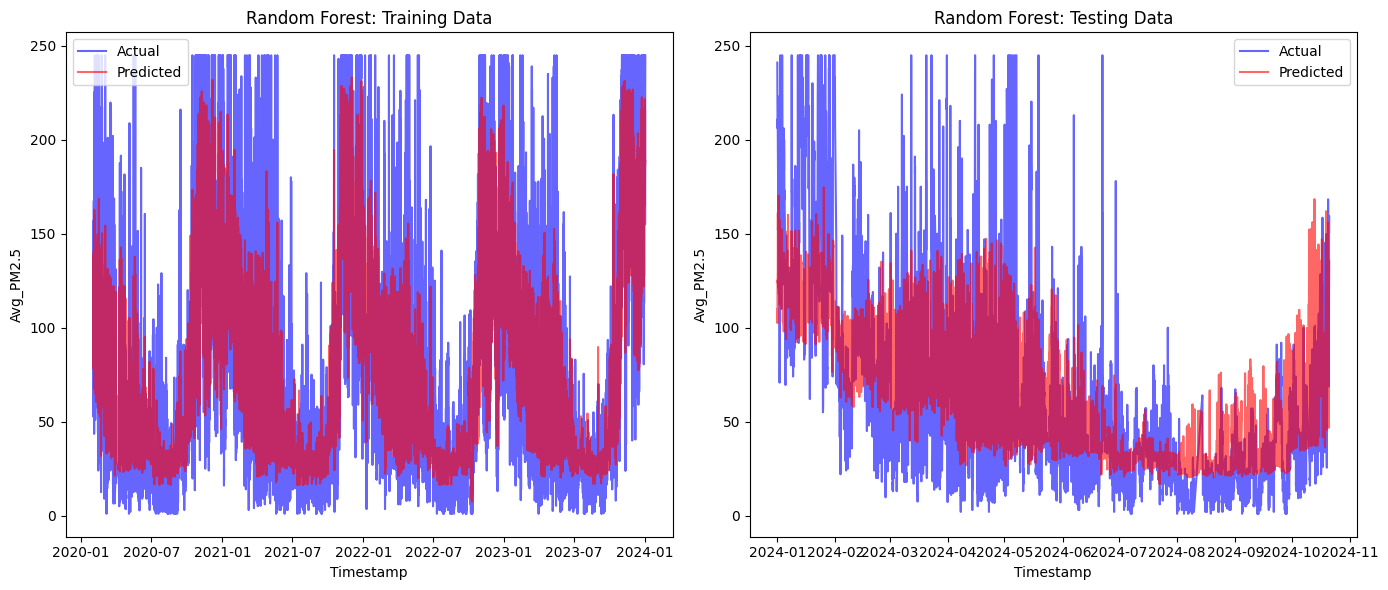

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Calculate R² scores
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Train R²: {r2_train_rf}")
print(f"Random Forest Test R²: {r2_test_rf}")

# Visualization for Random Forest
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_rf, label='Predicted', alpha=0.6, color='red')
plt.title("Random Forest: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_rf, label='Predicted', alpha=0.6, color='red')
plt.title("Random Forest: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


XGBoost Train R²: 0.6990336331932743
XGBoost Test R²: 0.5106753568342375


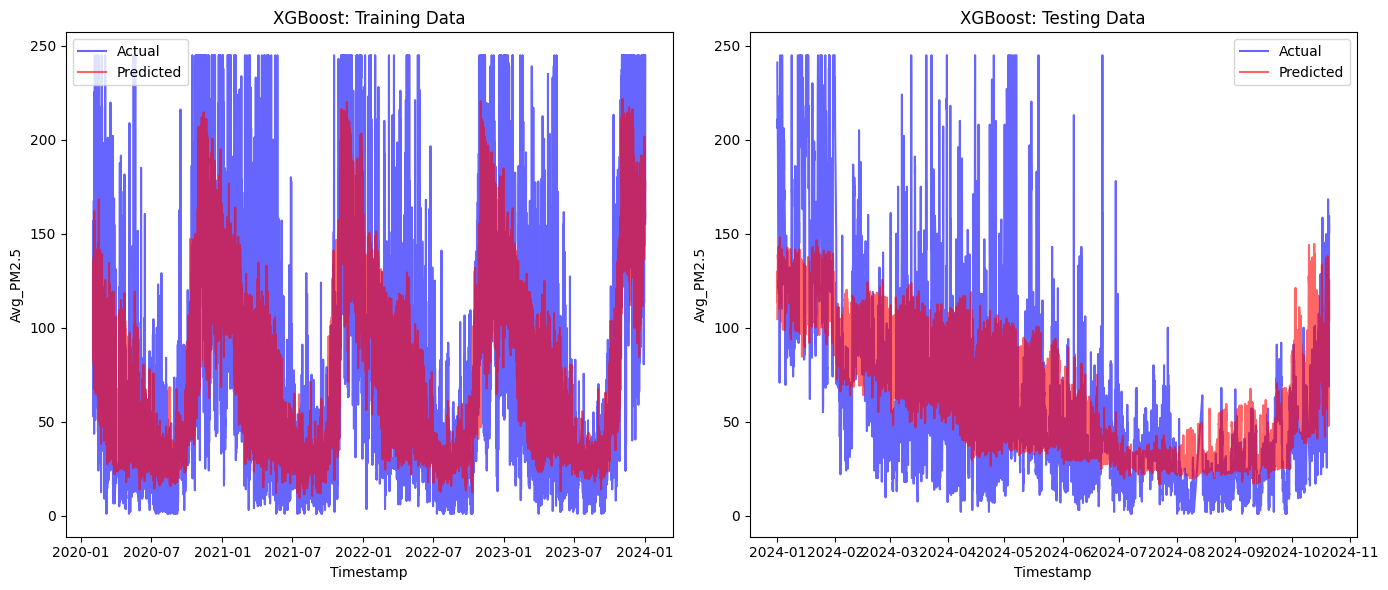

In [19]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgboost = XGBRegressor(n_estimators=100, max_depth=5,learning_rate = 0.05, random_state=42, eval_metric='rmse')

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions
y_train_pred_xgb = xgboost.predict(X_train)
y_test_pred_xgb = xgboost.predict(X_test)

# Calculate R² scores
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Train R²: {r2_train_xgb}")
print(f"XGBoost Test R²: {r2_test_xgb}")

# Visualization for XGBoost
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_xgb, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_xgb, label='Predicted', alpha=0.6, color='red')
plt.title("XGBoost: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [21]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Define ANN model
ann_model = Sequential([
    Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(256, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Train the model
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2853.1575 - mae: 37.6714 - val_loss: 1744.7113 - val_mae: 30.1848
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1870.7001 - mae: 31.4450 - val_loss: 1641.7994 - val_mae: 29.3971
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1796.7576 - mae: 30.7331 - val_loss: 1591.3845 - val_mae: 27.6259
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1691.9215 - mae: 29.6121 - val_loss: 1605.2220 - val_mae: 27.6572
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1629.8499 - mae: 29.1387 - val_loss: 1554.8574 - val_mae: 27.2263
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1587.9880 - mae: 28.7203 - val_loss: 1506.0388 - val_mae: 26.7466
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1527.9078 - mae: 28.0654 - val_loss: 1523.7329 - val_mae: 27.6086
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1486.4810 - mae: 27.7686 - val_loss: 1541.

1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Train R²: 0.6709555706756021
ANN Test R²: 0.4965887963657173


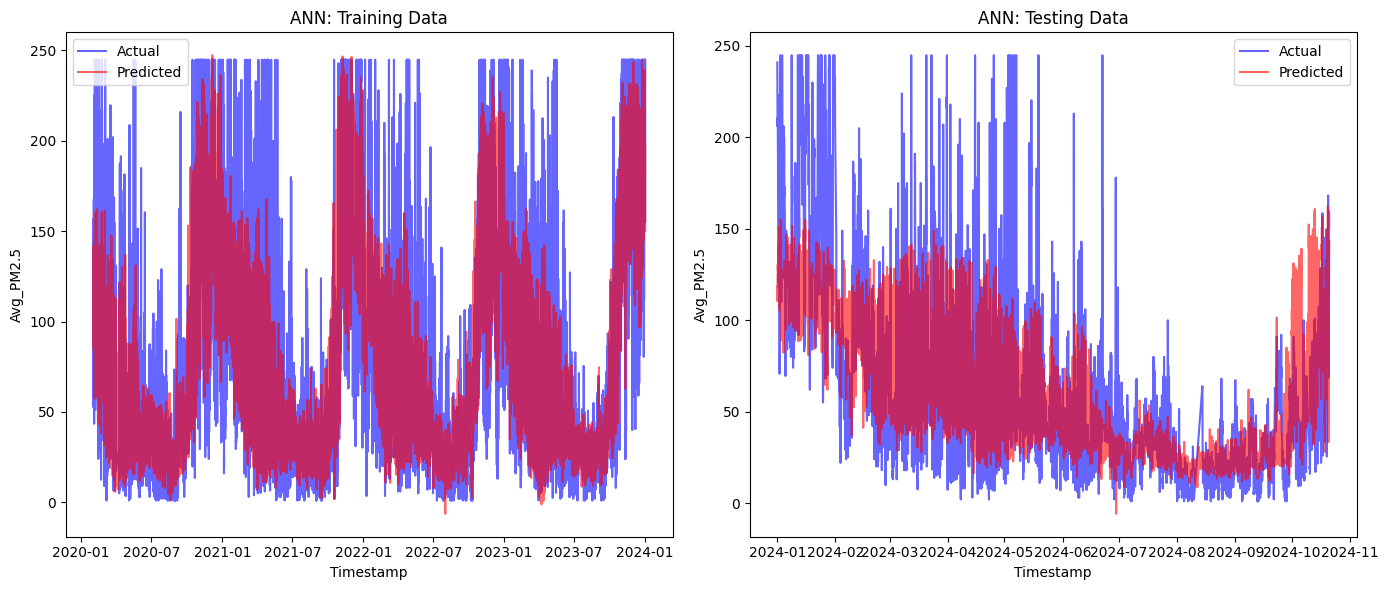

In [24]:
# Make predictions
y_train_pred_ann = ann_model.predict(X_train_scaled).flatten()
y_test_pred_ann = ann_model.predict(X_test_scaled).flatten()

# Calculate R² scores
r2_train_ann = r2_score(y_train, y_train_pred_ann)
r2_test_ann = r2_score(y_test, y_test_pred_ann)

print(f"ANN Train R²: {r2_train_ann}")
print(f"ANN Test R²: {r2_test_ann}")

# Visualization for ANN
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_ann, label='Predicted', alpha=0.6, color='red')
plt.title("ANN: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_ann, label='Predicted', alpha=0.6, color='red')
plt.title("ANN: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


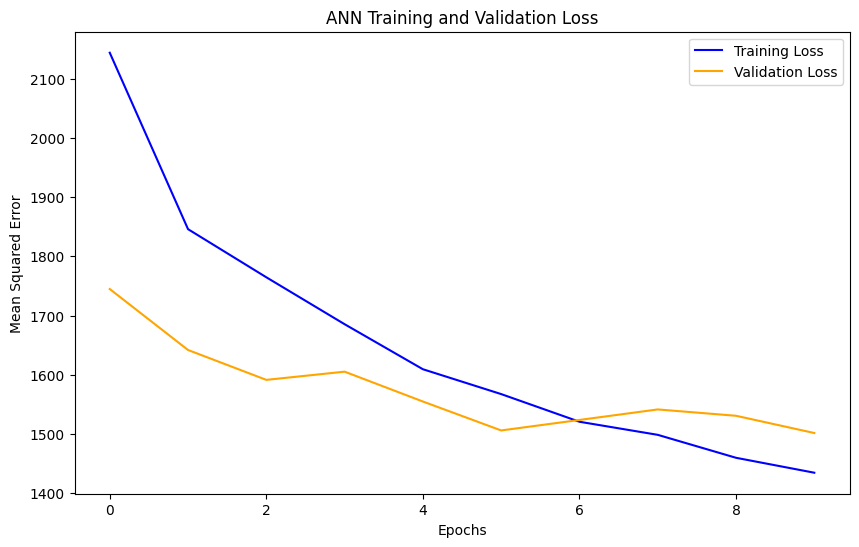

In [25]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("ANN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout


In [27]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN: (samples, timesteps=1, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [28]:
# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),  # Dropout for regularization
    Flatten(),  # Flatten the output
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Train the model
history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4487.6221 - mae: 46.8563 - val_loss: 1747.9202 - val_mae: 29.6836
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2045.0692 - mae: 32.7407 - val_loss: 1742.6997 - val_mae: 30.0492
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1976.3553 - mae: 32.2256 - val_loss: 1706.1244 - val_mae: 29.8515
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1945.7820 - mae: 31.9331 - val_loss: 1720.7925 - val_mae: 29.8701
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1924.3319 - mae: 31.7218 - val_loss: 1653.7893 - val_mae: 29.5507
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1903.6713 - mae: 31.4461 - val_loss: 1651.2291 - val_mae: 29.5355
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1860.6799 - mae: 31.1264 - val_loss: 1685.2679 - val_mae: 29.0842
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1827.3004 - mae: 30.8623 - val_loss: 1630.

1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN Train R²: 0.6002845886775634
CNN Test R²: 0.4630456951864975


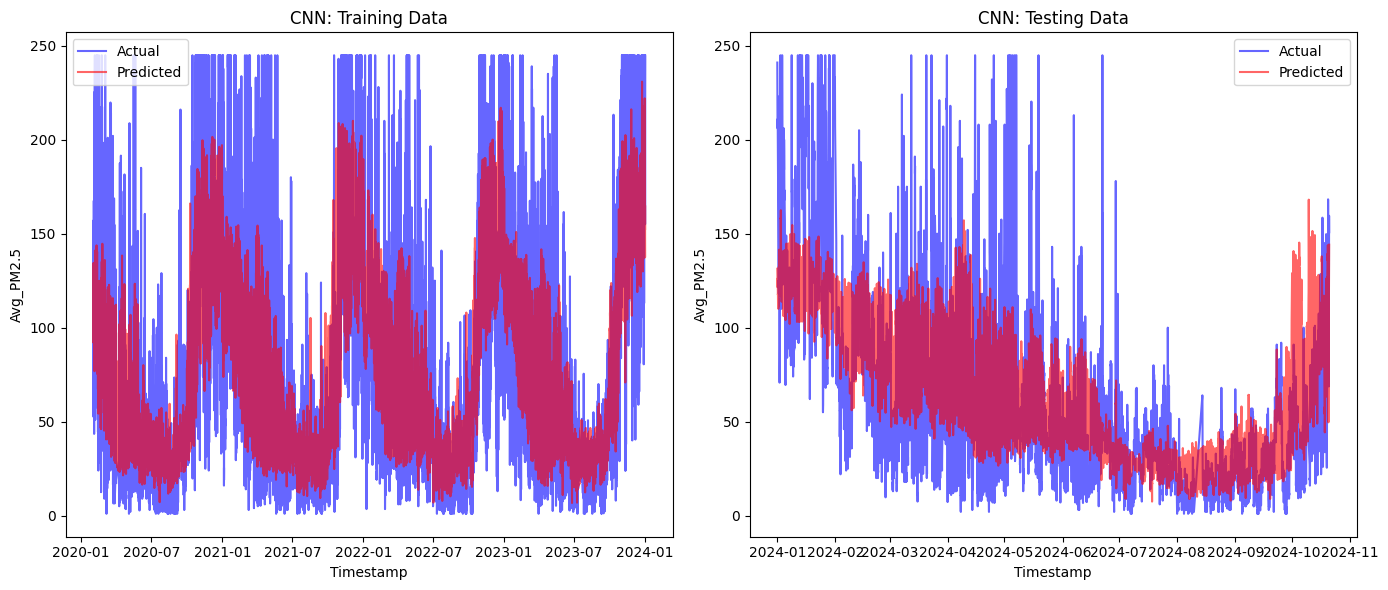

In [30]:
# Make predictions
y_train_pred_cnn = cnn_model.predict(X_train_cnn).flatten()
y_test_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

# Calculate R² scores
r2_train_cnn = r2_score(y_train, y_train_pred_cnn)
r2_test_cnn = r2_score(y_test, y_test_pred_cnn)

print(f"CNN Train R²: {r2_train_cnn}")
print(f"CNN Test R²: {r2_test_cnn}")

# Visualization for CNN
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_cnn, label='Predicted', alpha=0.6, color='red')
plt.title("CNN: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_cnn, label='Predicted', alpha=0.6, color='red')
plt.title("CNN: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


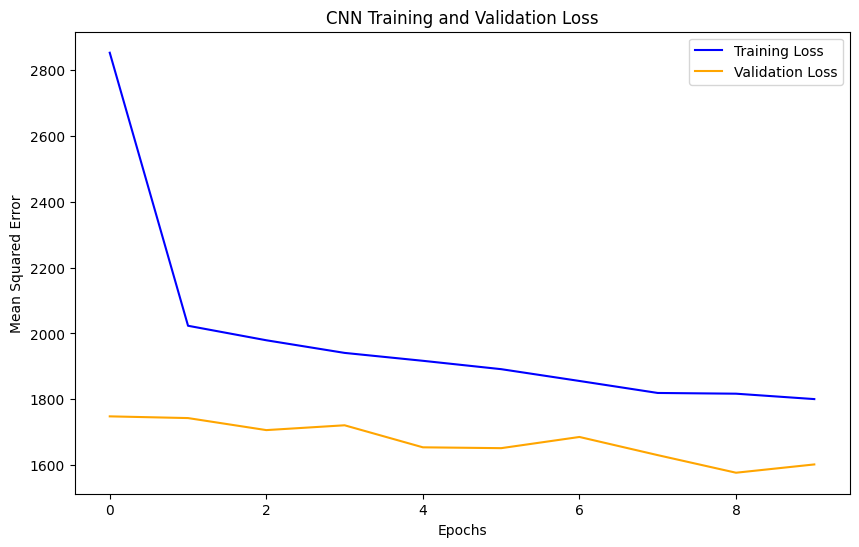

In [31]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("CNN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [33]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM: (samples, timesteps, features)
timesteps = 1  # You can adjust this based on your requirements
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1])


In [34]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, X_train_scaled.shape[1]), return_sequences=False),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4973.8389 - mae: 49.1957 - val_loss: 1785.9132 - val_mae: 30.2101
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1997.9258 - mae: 32.2981 - val_loss: 1820.8656 - val_mae: 30.3942
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1917.3562 - mae: 31.6753 - val_loss: 1693.2042 - val_mae: 29.3621
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1835.3508 - mae: 30.8741 - val_loss: 1723.8195 - val_mae: 29.6283
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1807.3289 - mae: 30.6280 - val_loss: 1664.5546 - val_mae: 28.7171
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1747.1943 - mae: 29.9841 - val_loss: 1659.7418 - val_mae: 28.3636
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1712.4598 - mae: 29.7922 - val_loss: 1665.2410 - val_mae: 28.7783
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1682.1306 - mae: 29.4697 - val_loss: 1627.

1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LSTM Train R²: 0.6319975016282368
LSTM Test R²: 0.4692285253558949


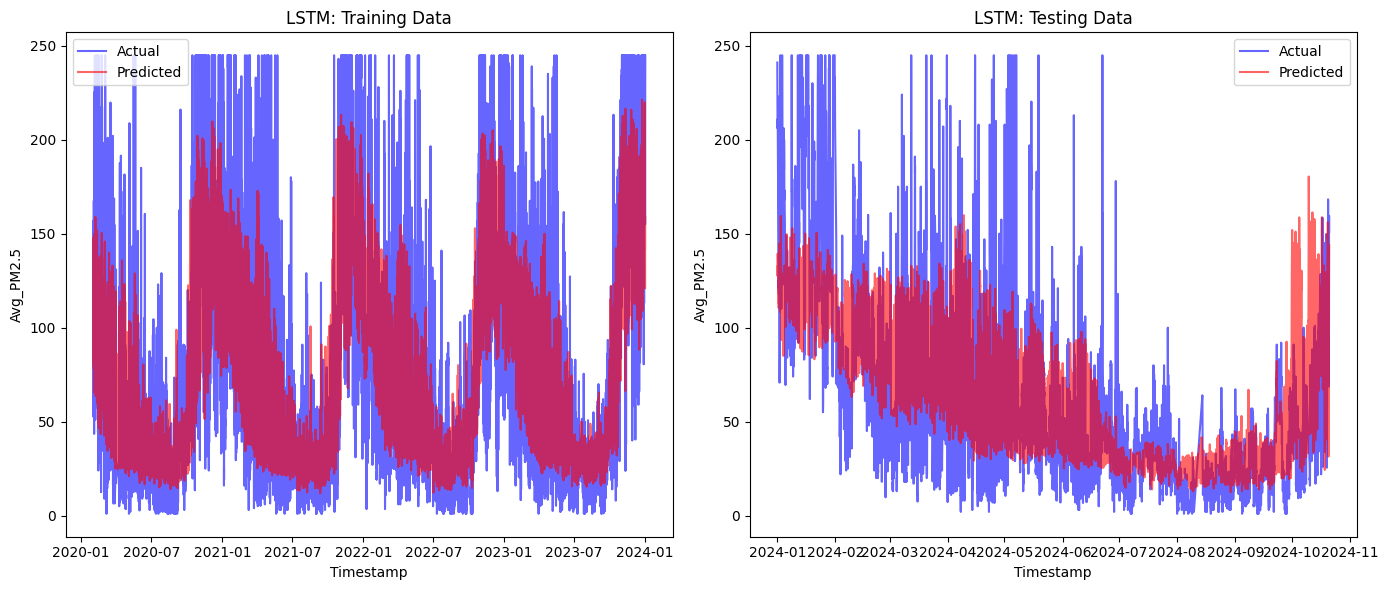

In [36]:
# Make predictions
y_train_pred_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate R² scores
r2_train_lstm = r2_score(y_train, y_train_pred_lstm)
r2_test_lstm = r2_score(y_test, y_test_pred_lstm)

print(f"LSTM Train R²: {r2_train_lstm}")
print(f"LSTM Test R²: {r2_test_lstm}")

# Visualization for LSTM
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(train_data['Timestamp'], y_train, label='Actual', alpha=0.6, color='blue')
plt.plot(train_data['Timestamp'], y_train_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Training Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(test_data['Timestamp'], y_test, label='Actual', alpha=0.6, color='blue')
plt.plot(test_data['Timestamp'], y_test_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Testing Data")
plt.xlabel("Timestamp")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


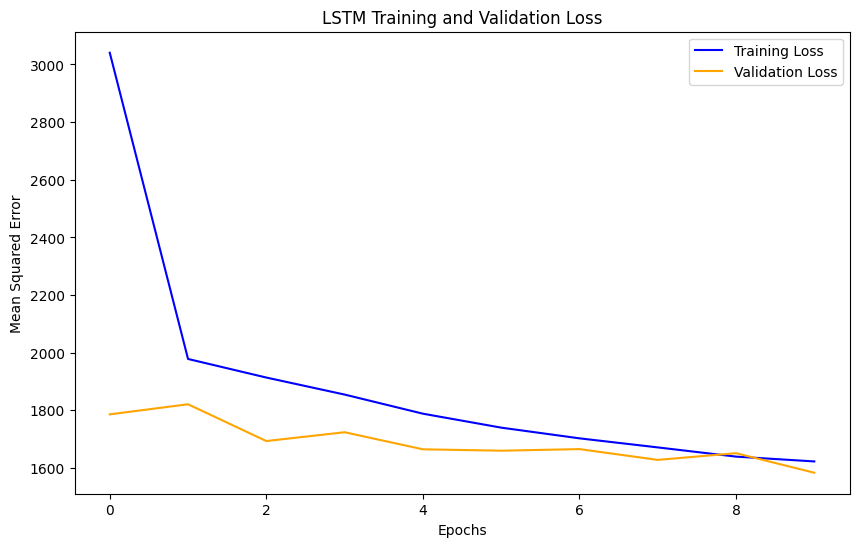

In [37]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


LSTM WITH # TIMESTAMPS

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [39]:
# Define timesteps
timesteps = 3

# Function to create sequences with multiple timesteps
def create_sequences(features, target, timesteps):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:i + timesteps])
        y.append(target[i + timesteps])
    return np.array(X), np.array(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply the function to create sequences
X_train_lstm, y_train_lstm = create_sequences(X_scaled, y_train, timesteps)

# Scale and create sequences for test data
X_test_scaled = scaler.transform(X_test)
X_test_lstm, y_test_lstm = create_sequences(X_test_scaled, y_test, timesteps)

# Check the shapes
print(f"X_train_lstm shape: {X_train_lstm.shape}")  # (samples, timesteps, features)
print(f"y_train_lstm shape: {y_train_lstm.shape}")


X_train_lstm shape: (34307, 3, 23)
y_train_lstm shape: (34307,)


In [40]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3975.0220 - mae: 43.5092 - val_loss: 1680.4707 - val_mae: 29.5494
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1824.1259 - mae: 30.5879 - val_loss: 1569.6016 - val_mae: 27.2095
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1709.1021 - mae: 29.4811 - val_loss: 1578.3743 - val_mae: 27.5516
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1583.0032 - mae: 28.3760 - val_loss: 1442.2388 - val_mae: 27.1683
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1572.4043 - mae: 28.3012 - val_loss: 1501.1445 - val_mae: 26.8124
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1525.9630 - mae: 27.5464 - val_loss: 1562.7124 - val_mae: 26.3525
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1477.9838 - mae: 27.1242 - val_loss: 1517.5815 - val_mae: 26.9655
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1413.4319 - mae: 26.7045 - val_loss: 1520.

In [42]:
print(len(y_train_lstm), len(y_train_pred_lstm))
print(len(y_test_lstm), len(y_test_pred_lstm))

34307 34310
7053 7056


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Train R²: 0.7066687097866826
LSTM Test R²: 0.46388383007525946


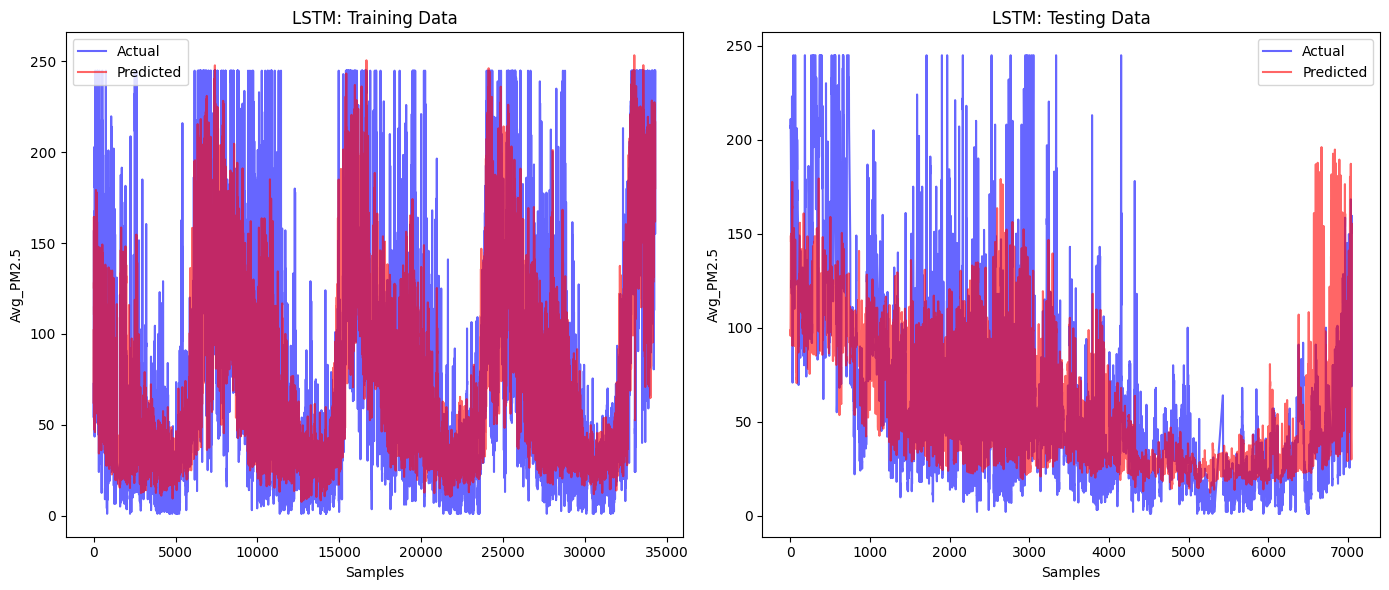

In [43]:
# Make predictions
y_train_pred_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate R² scores
r2_train_lstm = r2_score(y_train_lstm, y_train_pred_lstm)
r2_test_lstm = r2_score(y_test_lstm, y_test_pred_lstm)

print(f"LSTM Train R²: {r2_train_lstm}")
print(f"LSTM Test R²: {r2_test_lstm}")

# Visualization for LSTM
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train_lstm)), y_train_lstm, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_train_pred_lstm)), y_train_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Training Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_lstm)), y_test_lstm, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_test_pred_lstm)), y_test_pred_lstm, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM: Testing Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


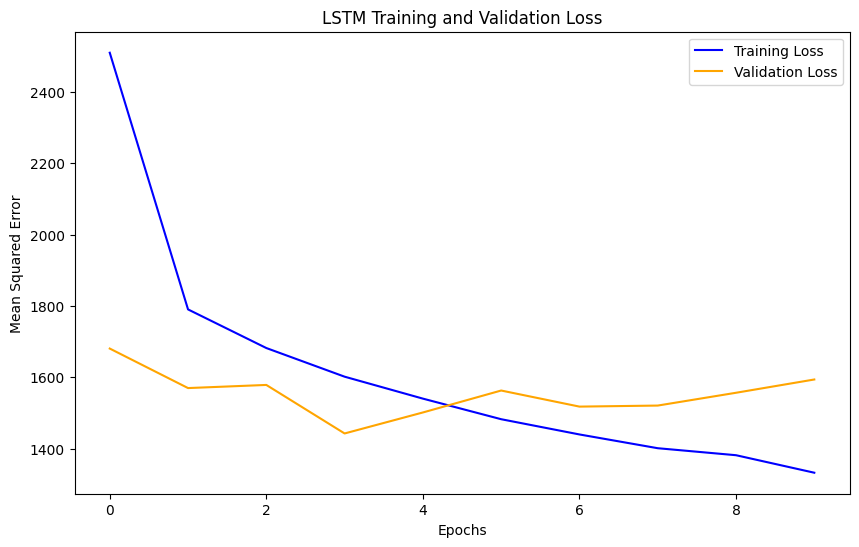

In [44]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


CNN WITH LSTM

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten


In [46]:
# Define timesteps
timesteps = 3

# Function to create sequences with multiple timesteps
def create_sequences(features, target, timesteps):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:i + timesteps])
        y.append(target[i + timesteps])
    return np.array(X), np.array(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply the function to create sequences
X_train_hybrid, y_train_hybrid = create_sequences(X_scaled, y_train, timesteps)

# Scale and create sequences for test data
X_test_scaled = scaler.transform(X_test)
X_test_hybrid, y_test_hybrid = create_sequences(X_test_scaled, y_test, timesteps)

# Check the shapes
print(f"X_train_hybrid shape: {X_train_hybrid.shape}")  # (samples, timesteps, features)
print(f"y_train_hybrid shape: {y_train_hybrid.shape}")


X_train_hybrid shape: (34307, 3, 23)
y_train_hybrid shape: (34307,)


In [47]:
# Define LSTM-CNN model
hybrid_model = Sequential([
    # Convolutional layer
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, X_train_hybrid.shape[2])),
    Dropout(0.2),  # Dropout for regularization

    # LSTM layer
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),

    # Fully connected layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
hybrid_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Train the model
history = hybrid_model.fit(
    X_train_hybrid, y_train_hybrid,
    validation_data=(X_test_hybrid, y_test_hybrid),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3401.6167 - mae: 40.2712 - val_loss: 1591.9397 - val_mae: 28.2892
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1835.3031 - mae: 30.5767 - val_loss: 1651.9447 - val_mae: 28.5150
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1710.2948 - mae: 29.3930 - val_loss: 1672.0121 - val_mae: 28.4738
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1588.4382 - mae: 28.2383 - val_loss: 1794.1895 - val_mae: 28.5179
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1588.5723 - mae: 28.1061 - val_loss: 1707.2440 - val_mae: 28.8326
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1500.8788 - mae: 27.4116 - val_loss: 1759.1910 - val_mae: 29.9394
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1485.5461 - mae: 27.3102 - val_loss: 1666.3793 - val_mae: 28.3036
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1468.6504 - mae: 27.1568 - val_loss: 1699.

1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Hybrid Model Train R²: 0.7119110929452643
Hybrid Model Test R²: 0.4565105102326773


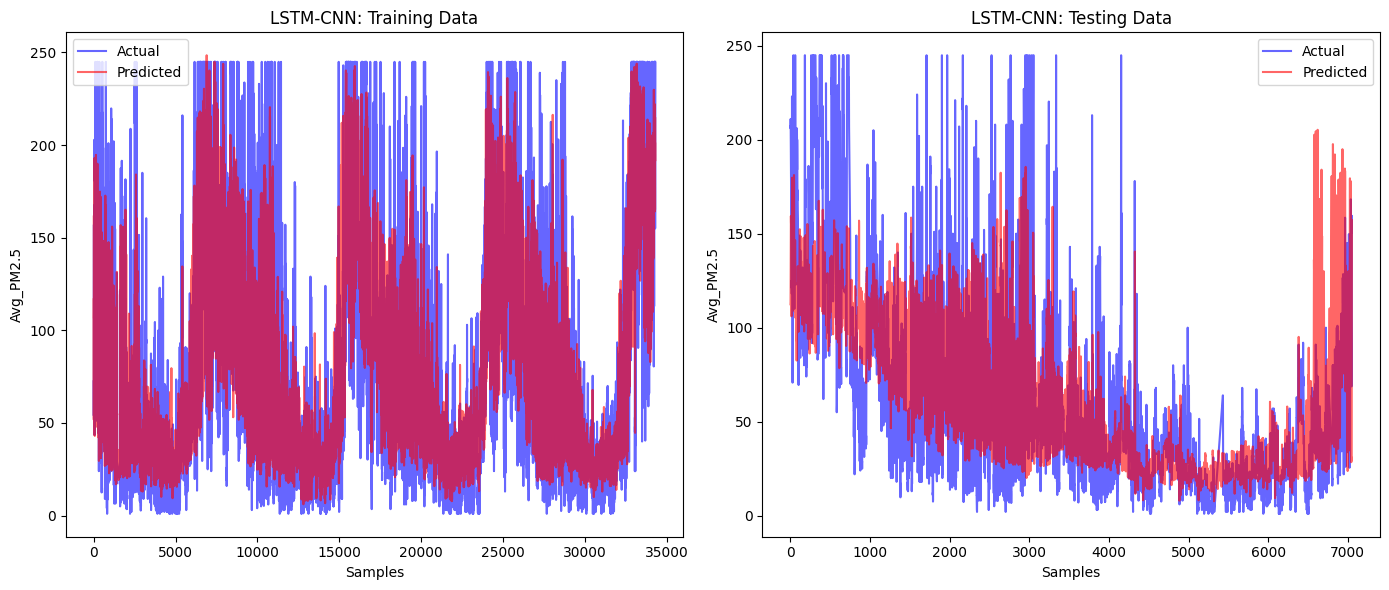

In [49]:
# Make predictions
y_train_pred_hybrid = hybrid_model.predict(X_train_hybrid).flatten()
y_test_pred_hybrid = hybrid_model.predict(X_test_hybrid).flatten()

# Calculate R² scores
r2_train_hybrid = r2_score(y_train_hybrid, y_train_pred_hybrid)
r2_test_hybrid = r2_score(y_test_hybrid, y_test_pred_hybrid)

print(f"Hybrid Model Train R²: {r2_train_hybrid}")
print(f"Hybrid Model Test R²: {r2_test_hybrid}")

# Visualization for Hybrid Model
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train_hybrid)), y_train_hybrid, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_train_pred_hybrid)), y_train_pred_hybrid, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM-CNN: Training Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_hybrid)), y_test_hybrid, label='Actual', alpha=0.6, color='blue')
plt.plot(range(len(y_test_pred_hybrid)), y_test_pred_hybrid, label='Predicted', alpha=0.6, color='red')
plt.title("LSTM-CNN: Testing Data")
plt.xlabel("Samples")
plt.ylabel("Avg_PM2.5")
plt.legend()

plt.tight_layout()
plt.show()


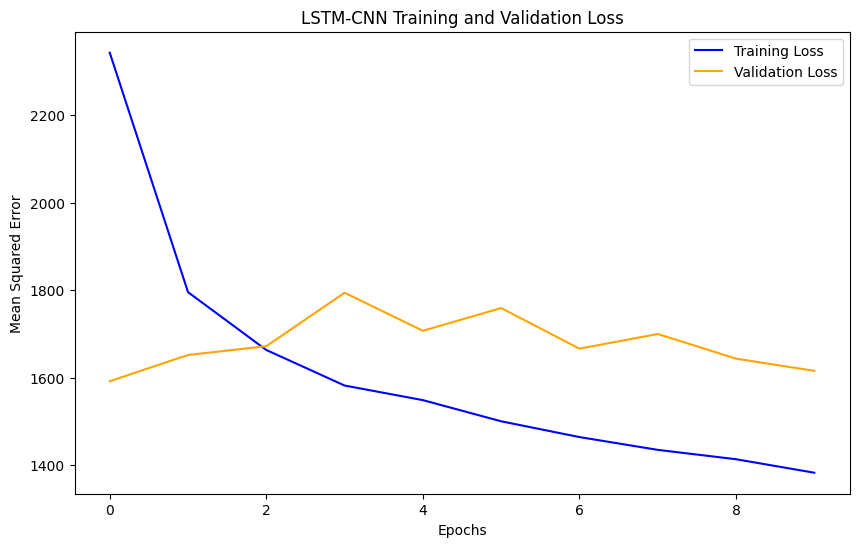

In [50]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM-CNN Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


Forecasting

In [98]:
# Import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Step 1: Load the data
file_path = '/content/Najafgarh_.xlsx'

# Define the columns to load
usecols = [
    'Timestamp', 'PM2.5 (Âµg/mÂ³)', 'PM10 (Âµg/mÂ³)', 'NO2 (Âµg/mÂ³)',
     'RH (%)', 'WS (m/s)','WD (deg)','SR (W/mt2)','BP (mmHg)','VWS (m/s)','AT (Â°C)','RF (mm)','TOT-RF (mm)',
]

# Load data using pandas
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=usecols)
print(df.index)
df.drop(df.index[0:9514],inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.index)


# Display the first few rows of the dataset




RangeIndex(start=0, stop=68400, step=1)
RangeIndex(start=0, stop=58886, step=1)


In [99]:
# Step 2: Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create new features from the timestamp
df['hour'] = df['Timestamp'].dt.hour  # Extract hour of the day
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['month'] = df['Timestamp'].dt.month  # Month (1=January, 12=December)

# Display the updated dataset
print(df.head())


            Timestamp  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  NO2 (Âµg/mÂ³)  \
0 2018-02-01 10:00:00            287.0           383.0          27.83   
1 2018-02-01 11:00:00            263.0           353.0          25.51   
2 2018-02-01 12:00:00            205.0           290.0          19.69   
3 2018-02-01 13:00:00            138.0           243.0          16.93   
4 2018-02-01 14:00:00            141.0           263.0          16.03   

   AT (Â°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  TOT-RF (mm)  SR (W/mt2)  \
0     21.00   54.40      1.38    315.00      NaN          0.0      423.80   
1     23.13   43.42      1.62    307.17      NaN          0.0      487.92   
2     25.82   35.17      1.80    300.83      NaN          0.0      537.83   
3     26.62   35.75      1.93    313.83      NaN          0.0      514.17   
4     26.88   37.08      2.17    318.08      NaN          0.0      387.50   

   BP (mmHg)  VWS (m/s)  hour  day_of_week  month  
0     994.00        0.0    10            3    

In [100]:
# Step 3: Assign month-based weights
month_weights = {
    1: 1.0, 2: 0.8, 3: 0.6, 4: 0.4, 5: 0.2, 6: 0.1,
    7: 0.1, 8: 0.1, 9: 0.2, 10: 0.6, 11: 0.9, 12: 1.0
}
df['PM2.5_month_weight'] = df['month'].map(month_weights)

# Assign hour-based weights
hour_weights = {
    0: 0.9, 1: 0.9, 2: 0.9, 3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6,
    7: 0.5, 8: 0.5, 9: 0.4, 10: 0.3, 11: 0.3, 12: 0.3,
    13: 0.3, 14: 0.2, 15: 0.2, 16: 0.3, 17: 0.4, 18: 0.5,
    19: 0.6, 20: 0.7, 21: 0.8, 22: 0.9, 23: 0.9
}
df['PM2.5_hour_weight'] = df['hour'].map(hour_weights)

# Display the updated dataset
print(df.head())
def fill_nan_with_iqr(df, columns):
    for col in columns:
        if df[col].isnull().sum() > 0:  # Check if there are missing values
            # Calculate Q1, Q3, and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Interpolate missing values
            df[col] = df[col].interpolate(method='linear', limit_direction='both')

            # Clip values to the IQR range
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns to process
columns_to_fill = [
    'PM2.5 (Âµg/mÂ³)', 'PM10 (Âµg/mÂ³)', 'NO2 (Âµg/mÂ³)',
     'RH (%)', 'WS (m/s)', 'WD (deg)','AT (Â°C)','RF (mm)','TOT-RF (mm)',
     'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]

# Fill NaN values in the dataset
df = fill_nan_with_iqr(df, columns_to_fill)

# Verify if all missing values are handled
print("Missing values after interpolation:")
print(df.isnull().sum())




            Timestamp  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  NO2 (Âµg/mÂ³)  \
0 2018-02-01 10:00:00            287.0           383.0          27.83   
1 2018-02-01 11:00:00            263.0           353.0          25.51   
2 2018-02-01 12:00:00            205.0           290.0          19.69   
3 2018-02-01 13:00:00            138.0           243.0          16.93   
4 2018-02-01 14:00:00            141.0           263.0          16.03   

   AT (Â°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  TOT-RF (mm)  SR (W/mt2)  \
0     21.00   54.40      1.38    315.00      NaN          0.0      423.80   
1     23.13   43.42      1.62    307.17      NaN          0.0      487.92   
2     25.82   35.17      1.80    300.83      NaN          0.0      537.83   
3     26.62   35.75      1.93    313.83      NaN          0.0      514.17   
4     26.88   37.08      2.17    318.08      NaN          0.0      387.50   

   BP (mmHg)  VWS (m/s)  hour  day_of_week  month  PM2.5_month_weight  \
0     994.00        0.0  

In [101]:

features = [
     'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)','VWS (m/s)','TOT-RF (mm)','AT (Â°C)','RF (mm)','hour','day_of_week','month'
]
target = 'PM2.5 (Âµg/mÂ³)'




In [102]:
lag_hours = 24*365

In [103]:
for feature in features:
    df[f"{feature}_lag_{lag_hours}"] = df[feature].shift(lag_hours)
df = df.dropna().reset_index(drop=True)

lagged_features = [f"{feature}_lag_{lag_hours}" for feature in features]
features_with_lag = features + lagged_features

In [104]:
df['PM2.5forecast']=df[target].shift(-24 )

In [105]:
df['PM2.5_lag_1'] = df[target].shift(1 * 24)       # Yesterday's value
df['PM2.5_lag_7'] = df[target].shift(7 * 24)       # Value 7 days ago
df['PM2.5_laghours'] = df[target].shift(lag_hours)

In [106]:
df['PM2.5_rolling_mean'] = df[target].rolling(window=7).mean()  # Weekly average
df['PM2.5_rolling_std'] = df[target].rolling(window=30).std()

In [107]:
df.dropna(inplace=True)
df.dropna().reset_index(drop=True)

,Timestamp,PM2.5 (Âµg/mÂ³),PM10 (Âµg/mÂ³),NO2 (Âµg/mÂ³),AT (Â°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),...,RF (mm)_lag_8760,hour_lag_8760,day_of_week_lag_8760,month_lag_8760,PM2.5forecast,PM2.5_lag_1,PM2.5_lag_7,PM2.5_laghours,PM2.5_rolling_mean,PM2.5_rolling_std
0,2020-02-01 10:00:00,127.00,192.00,48.975,16.85,53.70,0.95,320.97,0.0,0.0,...,0.0,10.0,4.0,2.0,90.50,77.000000,122.00,217.500,99.357143,26.982448
1,2020-02-01 11:00:00,102.00,153.50,28.000,18.52,49.45,1.17,176.25,0.0,0.0,...,0.0,11.0,4.0,2.0,111.00,92.500000,95.00,244.875,100.000000,25.940004
2,2020-02-01 12:00:00,73.50,109.50,22.380,19.90,46.38,1.67,184.50,0.0,0.0,...,0.0,12.0,4.0,2.0,109.50,101.000000,74.25,244.875,98.642857,24.711244
3,2020-02-01 13:00:00,72.50,101.00,18.480,20.30,45.52,1.80,91.55,0.0,0.0,...,0.0,13.0,4.0,2.0,79.50,85.666667,62.25,234.000,97.285714,23.899067
4,2020-02-01 14:00:00,66.50,91.00,15.580,19.85,45.50,2.15,12.02,0.0,0.0,...,0.0,14.0,4.0,2.0,61.00,70.333333,50.75,230.000,94.071429,23.845351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41337,2024-10-19 19:00:00,49.50,143.00,8.050,26.75,59.25,0.32,222.00,0.0,0.0,...,0.0,19.0,4.0,10.0,95.00,59.500000,66.00,45.000,35.142857,36.207909
41338,2024-10-19 20:00:00,57.00,151.00,8.750,26.00,66.50,0.28,197.00,0.0,0.0,...,0.0,20.0,4.0,10.0,130.00,90.250000,72.00,70.000,37.392857,36.415309
41339,2024-10-19 21:00:00,64.25,151.00,7.980,25.20,69.50,0.43,262.00,0.0,0.0,...,0.0,21.0,4.0,10.0,135.00,100.500000,84.00,88.750,42.000000,36.398462
41340,2024-10-19 22:00:00,74.25,163.00,7.750,24.90,69.00,0.35,147.25,0.0,0.0,...,0.0,22.0,4.0,10.0,159.50,93.500000,90.00,91.000,48.321429,35.632412


In [108]:
features_forecast = ['PM2.5_lag_1', 'PM2.5_lag_7', 'PM2.5_rolling_mean', 'PM2.5_rolling_std','PM2.5_laghours'] + features_with_lag

In [137]:
df_corr = df.corr()
print(df_corr)

                      Timestamp  PM2.5 (Âµg/mÂ³)  PM10 (Âµg/mÂ³)  \
Timestamp              1.000000        -0.035653       -0.040338   
PM2.5 (Âµg/mÂ³)       -0.035653         1.000000        0.810618   
PM10 (Âµg/mÂ³)        -0.040338         0.810618        1.000000   
NO2 (Âµg/mÂ³)         -0.206045         0.528455        0.531873   
AT (Â°C)               0.026299        -0.550344       -0.255229   
RH (%)                 0.138378         0.225587       -0.108865   
WS (m/s)              -0.567196        -0.232387       -0.107043   
WD (deg)               0.156752         0.102805        0.074156   
RF (mm)                     NaN              NaN             NaN   
TOT-RF (mm)           -0.003862        -0.040510       -0.049578   
SR (W/mt2)            -0.088047        -0.167112       -0.097610   
BP (mmHg)             -0.110379         0.570922        0.344021   
VWS (m/s)                   NaN              NaN             NaN   
hour                   0.000156        -0.115967

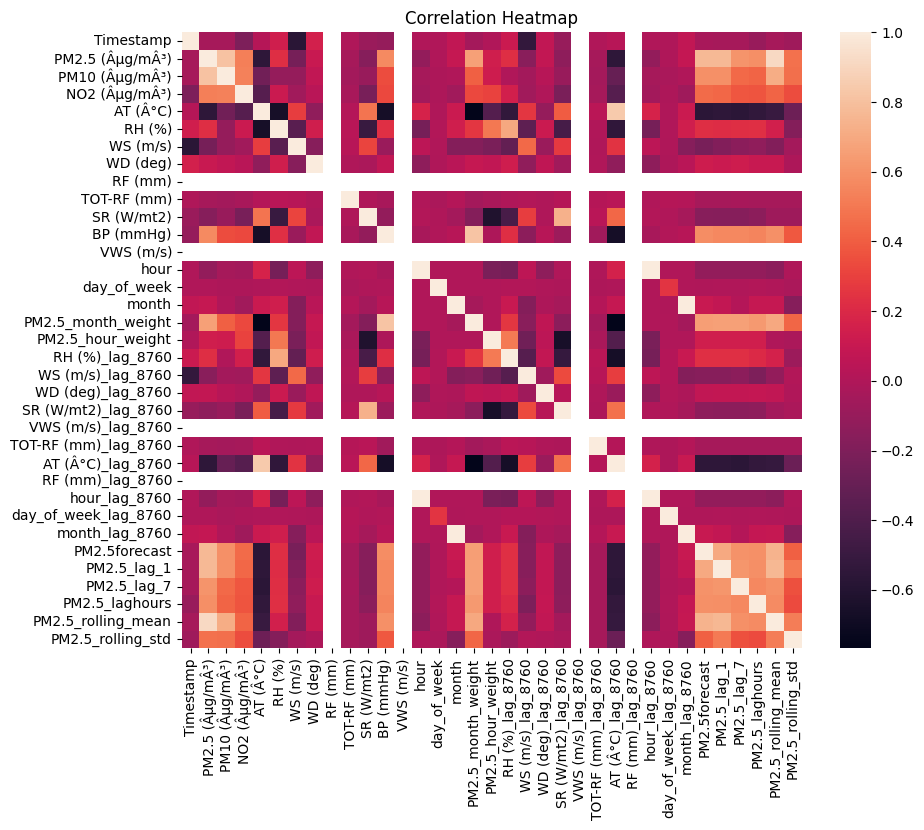

In [141]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [151]:
correlation_with_target = df_corr['PM2.5forecast']
print(correlation_with_target)

Timestamp              -0.034635
PM2.5 (Âµg/mÂ³)         0.771172
PM10 (Âµg/mÂ³)          0.594057
NO2 (Âµg/mÂ³)           0.450138
AT (Â°C)               -0.563233
RH (%)                  0.225748
WS (m/s)               -0.228618
WD (deg)                0.124649
RF (mm)                      NaN
TOT-RF (mm)            -0.039548
SR (W/mt2)             -0.162363
BP (mmHg)               0.581053
VWS (m/s)                    NaN
hour                   -0.115989
day_of_week            -0.004534
month                   0.102999
PM2.5_month_weight      0.652081
PM2.5_hour_weight       0.139698
RH (%)_lag_8760         0.228826
WS (m/s)_lag_8760      -0.160899
WD (deg)_lag_8760       0.070456
SR (W/mt2)_lag_8760    -0.137533
VWS (m/s)_lag_8760           NaN
TOT-RF (mm)_lag_8760   -0.041531
AT (Â°C)_lag_8760      -0.548712
RF (mm)_lag_8760             NaN
hour_lag_8760          -0.115989
day_of_week_lag_8760   -0.003651
month_lag_8760          0.098350
PM2.5forecast           1.000000
PM2.5_lag_

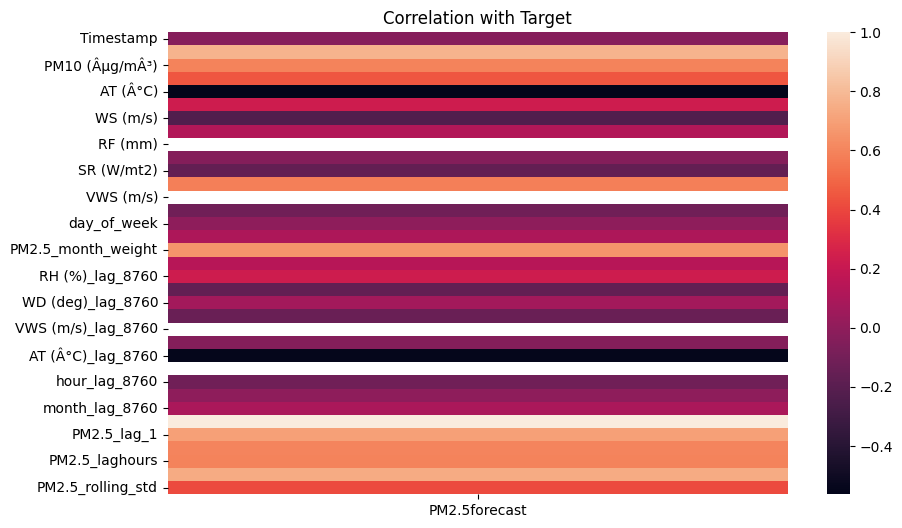

In [152]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_target.to_frame())
plt.title('Correlation with Target')
plt.show()

Train and Test Split

In [109]:
train = df[df['Timestamp'].dt.year <= 2023]  # Training data
test = df[df['Timestamp'].dt.year == 2024]  # Testing data


In [110]:
train.shape

(34310, 35)

In [111]:
test.shape

(7032, 35)

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [113]:
X_train, X_test = train[features_forecast], test[features_forecast]
y_train, y_test = train['PM2.5forecast'], test['PM2.5forecast']

Decision Tree

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=7, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = decision_tree.predict(X_train)
y_test_pred_tree = decision_tree.predict(X_test)

# Calculate R² scores
r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)


print(f"Decision Tree Train R²: {r2_train_tree}")
print(f"Decision Tree Test R²: {r2_test_tree}")



Decision Tree Train R²: 0.6866906227736236
Decision Tree Test R²: 0.5707693251086561


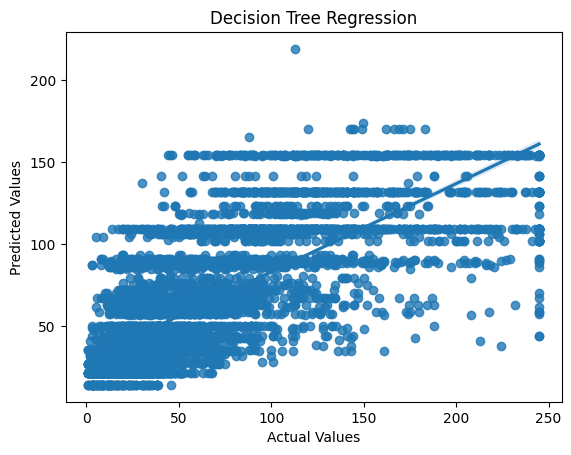

In [126]:
import seaborn as sns
sns.regplot(x=y_test, y=y_test_pred_tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression')
plt.show()

Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Calculate R² scores
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Train R²: {r2_train_rf}")
print(f"Random Forest Test R²: {r2_test_rf}")


Random Forest Train R²: 0.8225156883878066
Random Forest Test R²: 0.613159361836511


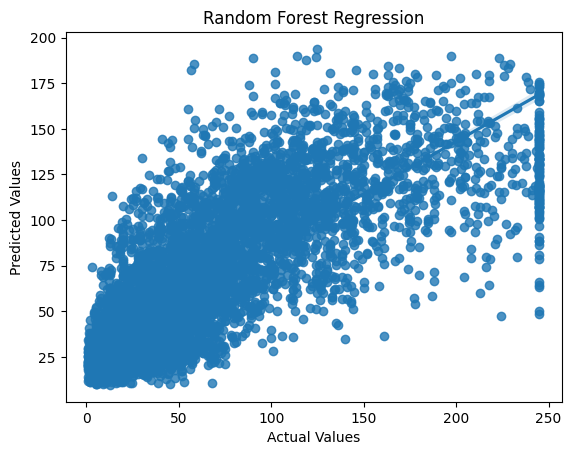

In [131]:
import seaborn as sns
sns.regplot(x=y_test, y=y_test_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

XGB

In [132]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgboost = XGBRegressor(n_estimators=100, max_depth=5,learning_rate = 0.05, random_state=42, eval_metric='rmse')

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions
y_train_pred_xgb = xgboost.predict(X_train)
y_test_pred_xgb = xgboost.predict(X_test)

# Calculate R² scores
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Train R²: {r2_train_xgb}")
print(f"XGBoost Test R²: {r2_test_xgb}")

XGBoost Train R²: 0.737874071349492
XGBoost Test R²: 0.6265108137210254


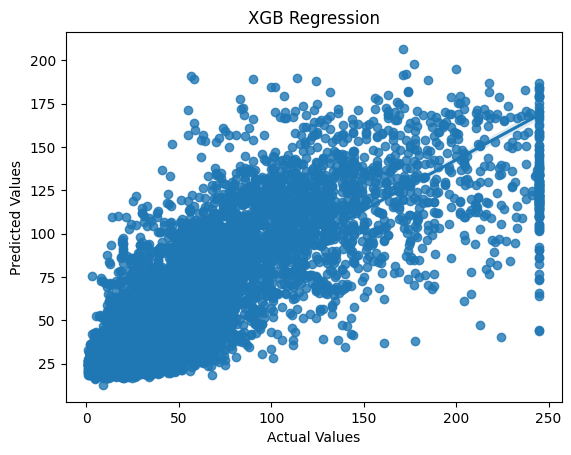

In [135]:
import seaborn as sns
sns.regplot(x=y_test, y=y_test_pred_xgb)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGB Regression')
plt.show()

LSTM Model

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [145]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM: (samples, timesteps, features)
timesteps = 1  # You can adjust this based on your requirements
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1])


In [146]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, X_train_scaled.shape[1]), return_sequences=False),
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:
# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 4364.9390 - mae: 45.5330 - val_loss: 1203.5471 - val_mae: 24.2361
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1548.1537 - mae: 27.8586 - val_loss: 1136.0765 - val_mae: 23.4844
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 1464.8384 - mae: 27.0706 - val_loss: 1126.5908 - val_mae: 23.6212
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1430.0514 - mae: 26.6098 - val_loss: 1131.7888 - val_mae: 22.9511
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1430.8065 - mae: 26.7468 - val_loss: 1119.7209 - val_mae: 22.9698
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1382.0084 - mae: 26.2114 - val_loss: 1104.1464 - val_mae: 22.8692
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1379.0979 - mae: 26.0763 - val_loss: 1093.9078 - val_mae: 22.8108
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1367.9105 - mae: 26.0929 - val_loss: 109

In [148]:
# Make predictions
y_train_pred_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate R² scores
r2_train_lstm = r2_score(y_train, y_train_pred_lstm)
r2_test_lstm = r2_score(y_test, y_test_pred_lstm)

print(f"LSTM Train R²: {r2_train_lstm}")
print(f"LSTM Test R²: {r2_test_lstm}")



1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Train R²: 0.6990850308361521
LSTM Test R²: 0.6218728082660905


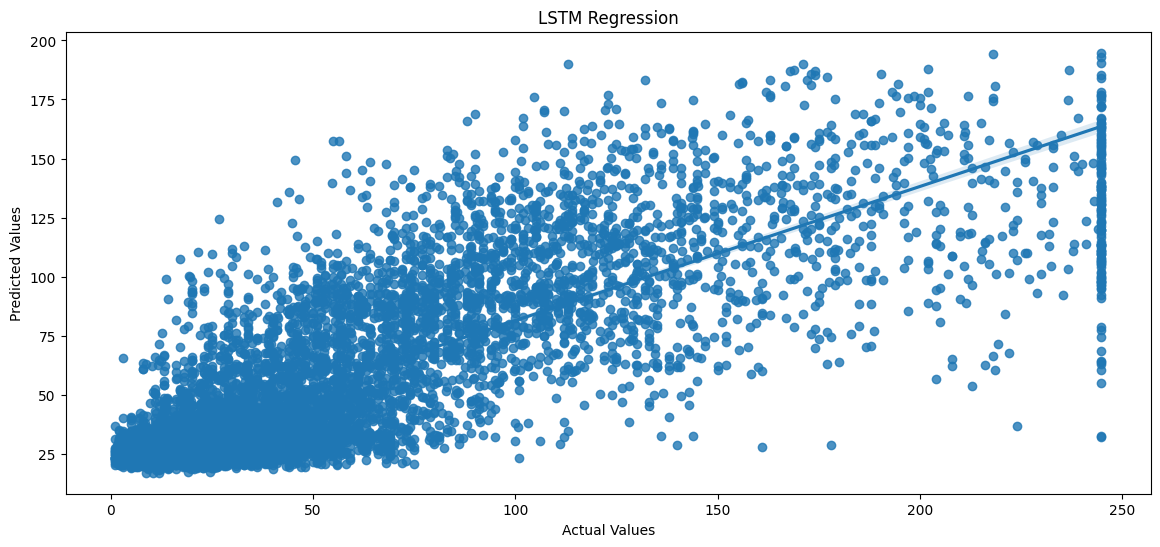

In [149]:
plt.figure(figsize=(14, 6))
sns.regplot(x=y_test, y=y_test_pred_lstm)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM Regression')
plt.show()

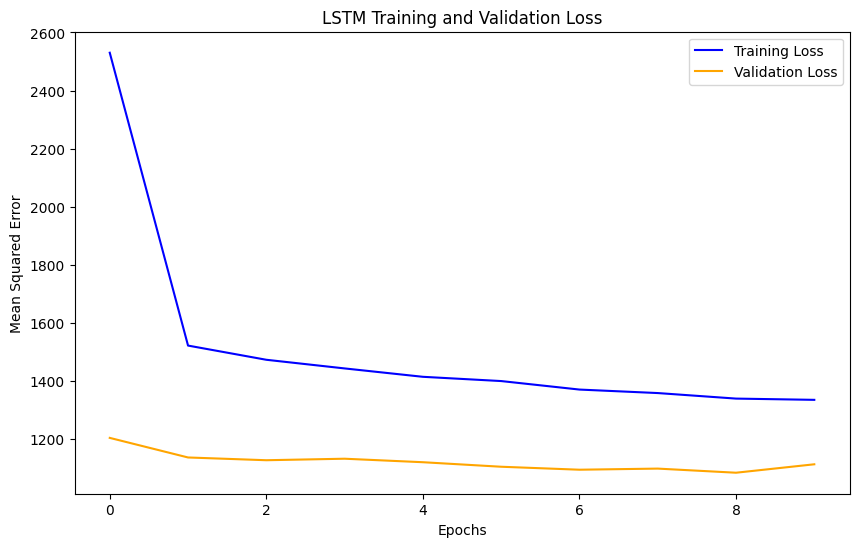

In [150]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()
